# Obyčejné diferenciální rovnice (ODR)

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Vektorové vyjádření systému rovnic
$$ \dfrac{\mathrm{d}\vec y}{\mathrm{d}x}=\vec f (x,\vec y)$$

- ODR $N$-tého řádu převádíme na soustavu $N$ diferenciálních rovnic 1. řádu
- Potřebujeme  $N$ počátečních podmínek
- Řešení se liší v závislosti na počátečních podmínkách:
    1. **Počáteční problém**: všechny podmínky **jsou** zadány v jednom bodě
    2. **Okrajový problém**: všechny podmínky **nejsou** zadány v jednom bodě
    
## Runge-Kuttovy metody pro řešení počátečního problému
### Eulerova metoda
- Z Taylorova rozvoje známe směrnici tečny
- V každém bodě $x_{1},x_{2}\dots x_{n}$ aproximujeme funkci její tečnou
$$ y(x+h)\approx y(x)+hf\left( x,y(x)\right)$$
- Metodu lze zpřesnit zmenšením vzdálenosti $h=x_{k+1}-x_{k}$

### Metoda středního bodu
- Přesnější vyjádření směrnice tečny:
    1. Provedeme poloviční krok $h/2$ pomocí Eulerovy metody
    2. V tomto bodě vypočítáme směrnici tečny
    3. Tuto směrnici použijeme k provedení celého kroku z bodu $x$ do $x+h$
$$ y(x+h)\approx y(x)+hf\left[ x+\dfrac{h}{2},y(x)+\dfrac{h}{2}f\left( x,y(x)\right) \right]   $$

### Heunova metoda
- Opět zpřesňujeme vyjádření směrnice tečny:
    1. Směrnici tečny v bodě $x+h$ určíme pomocí Eulerovy metody
    2. Uděláme průměr ze směrnic v bodech $x$ a $x+h$
    3. Tuto směrnici použijeme k provedení celého kroku z bodu $x$ do $x+h$
$$ y(x+h)\approx y(x)+\dfrac{h}{2}\lbrace f \left( x,y(x) \right) + f\left[x+h,y(x)+hf(x,y(x))\right]\rbrace   $$

### Runge-Kuttova metoda 4. řádu
- Využívá postupné zpřesňování hodnot derivace v bodech mezi $x$ a $x+h$
- [Odvození](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/09_ODE/DOCS/teorie_RK.pdf)
- Postup výpočtu:
$$ k_{1}=f(x_{n},y_{n})$$
$$ k_{2}=f(x_{n}+\dfrac{h}{2},y_{n}+\dfrac{h}{2}k_{1})$$
$$ k_{3}=f(x_{n}+\dfrac{h}{2},y_{n}+\dfrac{h}{2}k_{2})$$
$$ k_{4}=f(x_{n}+h,y_{n}+hk_{3})$$
$$ y_{n+1}\approx y_{n}+\dfrac{h}{6}\left(k_{1}+2k_{2}+2k_{3}+k_{4} \right)$$

- Pro Runge-Kuttovy metody obecně platí:
    - Výhody: robustní metoda, funguje témeř vždy
    - Nevýhody: na jeden krok je potřeba funkci několikrát vyčíslit, nehodí se pro řešení rovnic se silným tlumením (stiff rovnice)

<div class="alert alert-block alert-warning"><b>Cvičení 10.01: </b>Vyřešete modelovou úlohu popisující časový vývoj počtu bakterií $\dfrac{\mathrm{d}N}{\mathrm{d}t}=(1+\cos t)N(t)$ výše zmíněnými metodami. Předpokládáme, že na počátku žije jen jedna bakterie.</div>

Text(0.5, 0, '$t$')

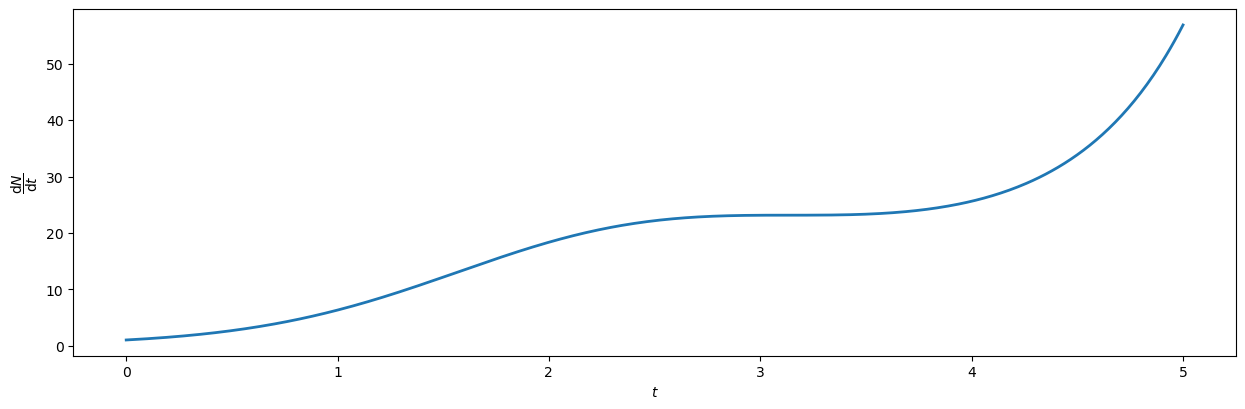

In [2]:
# kod

# pocatecni podminky
uH  = 1 # Heunova metoda
uSB = 1 # Metoda stredniho bodu
uE  = 1 # Eulerova metoda
uRK = 1 # Runge-Kutta

# konecny cas
T = 5

# casove kroky
tA = np.linspace(0,T,num=500)

## resime tuto rovnici f(x,y(x))=dy(x)/dx:
def f(x,y):
    return (1 + np.cos(x)) * y

# presne reseni
exact = np.exp(tA + np.sin(tA)) 

# delka kroku
h = 0.1 
##


## stiff
#def f(x,y):
#    return -15*y
#
## presne reseni
#exact = np.exp(-15*tA ) 
#
#
# delka kroku (0.1 - 0.2)
#h=0.1
##


fig, ax = plt.subplots(figsize=(15,4.5))
ax.plot(tA,exact,linewidth=2) # zobrazime presne reseni

t = 0
while t<T:
    # DOPLNTE
    # Eulerova metoda
    #ax.plot(t,uE, marker="+", color='C1')
    # uE = uE + ...
    #
    # Metoda stredniho bodu
    #ax.plot(t,uSB, marker="s", color='c')
    #
    # Heunova metoda
    #ax.plot(t,uH, marker="x", color='k')
    #
    # Runge-Kutta 4. rad
    #ax.plot(t,uRK, marker=".", color='r')
    #    
    # DOPLNTE
    t = t + h
    
ax.set_ylabel(r'$\dfrac{\mathrm{d}N}{\mathrm{d}t}$')
ax.set_xlabel(r'$t$')
#ax.set_xlim((4.5,5))
#ax.set_ylim((0,60))


# stiff rovnice
#ax.set_ylim((-1,1))

## Stiff rovnice (rovnice se silným tlumením)
- Takové rovnice, které v sobě obsahují útlum s charakteristickým časem $\tau \ll $ jiný charakteristický čas úlohy
- Pro řešení je potřeba zvolit délku kroku $h \leq \tau$ 

## Řešení soustav diferenciálních rovnic
- Zadnou úlohu převedeme na soustavu $N$ diferenciálních rovnic 1. řádu

<div class="alert alert-block alert-warning"><b>Cvičení 10.02: </b> Runge-Kuttovou metodou čtvrtého řádu vyřešte <a href="https://cs.wikipedia.org/wiki/Keplerova_%C3%BAloha">Keplerovu úlohu</a> dle <a href="http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/09_ODE/DOCS/priklad_ode_soustava.pdf">tohoto</a> zadání.</div>

Text(0, 0.5, 'y')

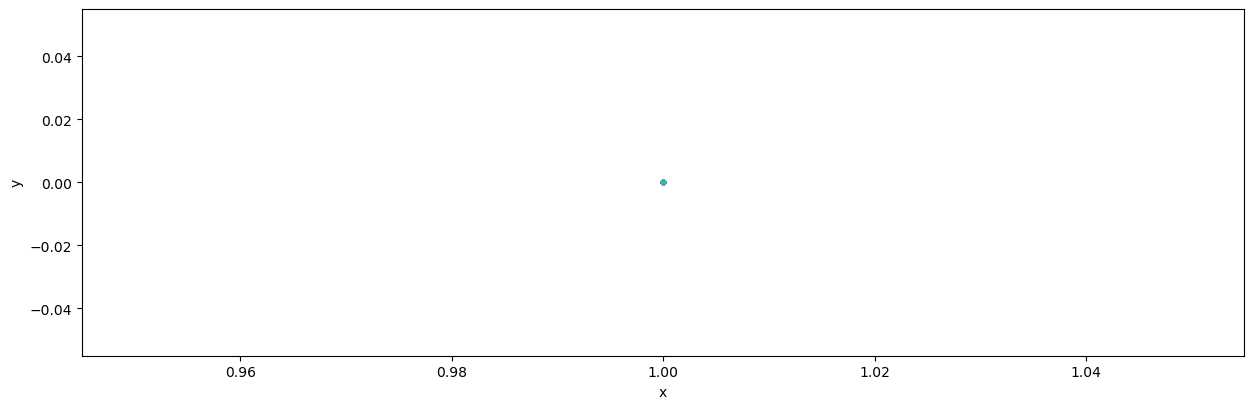

In [3]:
# kod

# metodou Runge-Kuta ctvrteho radu budeme resit soustavu dvou rovnic druheho radu (problem dvou teles)

# konecny cas
T = 20

# pocatecni podminky
# array([x, dx/dt, y, dy/dt])
u = np.array([1, -0.3, 0, 0.3])


def f(u):
    w = np.zeros(4)
    # DOPLNTE
    #
    # DOPLNTE    
    return w

fig, ax = plt.subplots(figsize=(15,4.5))

t = 0
while t<T:    
    #r = (u[0]**2+u[2]**2)**(1/2)    
    #h = 1e-1*r**2
    h = 0.005 # delka kroku
    t = t + h
    ax.scatter(u[0], u[2], marker=".")
    # DOPLNTE
    u = u
    # DOPLNTE
    
ax.set_xlabel('x')
ax.set_ylabel('y')

## Další metody řešení ODR
- [Zde](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/09_ODE/DOCS/teorie_ode_dalsi_metody.pdf)